### Reading data from CSV in Python

In [ ]:
import pandas as pd
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/addresses.csv"
filename ='addresses.csv'
urllib.request.urlretrieve(url, filename)
df = pd.read_csv("addresses.csv")
df

### Adding column name to the DataFrame

In [ ]:
df.columns =['First Name', 'Last Name', 'Location ', 'City','State','Area Code']
df

### Selecting columns

In [ ]:
df["First Name"]
df = df[['First Name', 'Last Name', 'Location ', 'City','State','Area Code']]
df


### Selecting rows using .iloc and .loc

In [ ]:
# To select the first row
df.loc[0]

In [ ]:
# To select the 0th,1st and 2nd row of "First Name" column only
df.loc[[0,1,2], "First Name" ]

### Transform Function in Pandas

In [ ]:
import numpy as np
#creating a dataframe
df=pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['a', 'b', 'c'])
df


In [ ]:
#applying the transform function - add 10 to each element in a dataframe
df = df.transform(func = lambda x : x + 10)
df

In [ ]:
# find the square root to each element of the dataframe
result = df.transform(func = ['sqrt'])
result

### JSON file Format

In [ ]:
import json
person = {
    'first_name' : 'Mark',
    'last_name' : 'abc',
    'age' : 27,
    'address': {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}

#### serialization using dump() function

json.dumps() that helps in converting a dictionary to a JSON object.

It takes two parameters:

dictionary – name of the dictionary which should be converted to JSON object.

indent – defines the number of units for indentation

In [ ]:
# Serializing json  
json_object = json.dumps(person, indent = 4) 
  
# Writing to sample.json 
with open("sample.json", "w") as outfile: 
    outfile.write(json_object) 

In [ ]:
print(json_object)

#### Reading JSON to a File
Using json.load()

The JSON package has json.load() function that loads the json content from a json file into a dictionary.

It takes one parameter:

File pointer : A file pointer that points to a JSON file.

In [ ]:
import json 
  
# Opening JSON file 
with open('sample.json', 'r') as openfile: 
  
    # Reading from json file 
    json_object = json.load(openfile) 
  
print(json_object) 
print(type(json_object)) 

### XLSX file format

In [ ]:
import pandas as pd
import urllib.request
urllib.request.urlretrieve("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/file_example_XLSX_10.xlsx", "file_example_XLSX_10.xlsx")
df = pd.read_excel("file_example_XLSX_10.xlsx")

In [ ]:
df

### XML format

#### Writing with xml.etree.ElementTree

In [ ]:
import xml.etree.ElementTree as ET

# create the file structure
employee = ET.Element('employee')
details = ET.SubElement(employee, 'details')
first = ET.SubElement(details, 'firstname')
second = ET.SubElement(details, 'lastname')
third = ET.SubElement(details, 'age')
first.text = 'Shiv'
second.text = 'Mishra'
third.text = '23'

# create a new XML file with the results
mydata1 = ET.ElementTree(employee)
# myfile = open("items2.xml", "wb")
# myfile.write(mydata)
with open("new_sample.xml", "wb") as files:
    mydata1.write(files)

#### Reading with xml.etree.ElementTree

In [ ]:
import pandas as pd
import urllib.request
urllib.request.urlretrieve("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Sample-employee-XML-file.xml", "Sample-employee-XML-file.xml")


You would need to firstly parse an XML file and create a list of columns for data frame, then extract useful information from the XML file and add to a pandas data frame.

In [ ]:
import xml.etree.ElementTree as etree
tree = etree.parse("Sample-employee-XML-file.xml")

# Get the root of the XML tree
root = tree.getroot()

# Define the columns for the DataFrame
columns = ["firstname", "lastname", "title", "division", "building", "room"]

# Initialize an empty DataFrame
datatframe = pd.DataFrame(columns=columns)

# Iterate through each node in the XML root
for node in root:
    # Extract text from each element
    firstname = node.find("firstname").text
    lastname = node.find("lastname").text
    title = node.find("title").text
    division = node.find("division").text
    building = node.find("building").text
    room = node.find("room").text
    
    # Create a DataFrame for the current row
    row_df = pd.DataFrame([[firstname, lastname, title, division, building, room]], columns=columns)
    
    # Concatenate with the existing DataFrame
    datatframe = pd.concat([datatframe, row_df], ignore_index=True)  

In [ ]:
datatframe

#### Reading xml file using pandas.read_xml function

In [ ]:
df=pd.read_xml("Sample-employee-XML-file.xml", xpath="/employees/details") 

### Save Data

In [ ]:
datatframe.to_csv("employee.csv", index=False)

#### Read/Save Other Data Formats

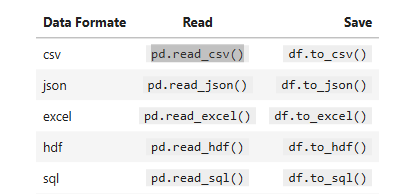

### Binary File Format

#### Reading the Image file

In [ ]:
from PIL import Image 
import urllib.request
urllib.request.urlretrieve("https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg", "dog.jpg")



In [ ]:
# Read image 
img = Image.open('./dog.jpg','r') 
  
# Output Images 
img.show()

### Data Analysis

#### About this Dataset

Context: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years of age of Pima Indian heritage.

Content: The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [ ]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"
urllib.request.urlretrieve(file_url, "diabetes.csv")
df = pd.read_csv("diabetes.csv")

In [ ]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

In [ ]:
# o view the dimensions of the dataframe, we use the .shape parameter.
df.shape

In [ ]:
# Statistical Overview of dataset
df.info()


In [ ]:
#Pandas describe() is used to view some basic statistical details like percentile, 
# mean, standard deviation, etc. of a data frame or a series of numeric values. 
# When this method is applied to a series of strings, it returns a different output
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Identify and handle missing values

In [32]:
missing_data = df.isnull()
missing_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [33]:
# Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Pregnancies
Pregnancies
False    768
Name: count, dtype: int64

Glucose
Glucose
False    768
Name: count, dtype: int64

BloodPressure
BloodPressure
False    768
Name: count, dtype: int64

SkinThickness
SkinThickness
False    768
Name: count, dtype: int64

Insulin
Insulin
False    768
Name: count, dtype: int64

BMI
BMI
False    768
Name: count, dtype: int64

DiabetesPedigreeFunction
DiabetesPedigreeFunction
False    768
Name: count, dtype: int64

Age
Age
False    768
Name: count, dtype: int64

Outcome
Outcome
False    768
Name: count, dtype: int64



#### Correct data format
Check all data is in the correct format (int, float, text or other).

In Pandas, we use

.dtype() to check the data type

.astype() to change the data type

Numerical variables should have type 'float' or 'int'.

In [34]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Visualization

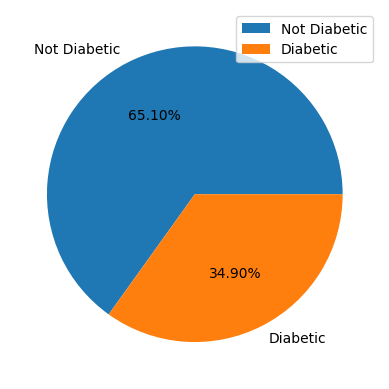

In [ ]:
import matplotlib.pyplot as plt
labels= 'Not Diabetic','Diabetic'
plt.pie(df['Outcome'].value_counts(),labels=labels,autopct='%0.02f%%')
plt.legend()
plt.show()

In [38]:
a=np.array([0,1,0,1,0]) 

b=np.array([1,0,1,0,1]) 

a/b

C:\Users\MANNN\AppData\Local\Temp\ipykernel_10216\3518336678.py:5: RuntimeWarning: divide by zero encountered in divide
  a/b


array([ 0., inf,  0., inf,  0.])